In [201]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [202]:
list_training = glob('/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/*/*/*.jpg')

In [203]:
list_training[0]

'/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/07_lego/lego_img/1_28x28_lego_123.jpg'

In [204]:
len(list_training)

2100

In [205]:
def get_label_from_path(path):
    str = (path.split('/')[-3])
    return int(str.split('_')[0])

In [206]:
get_label_from_path(list_training[0])

7

In [207]:
image = np.array(Image.open(list_training[0])) 

In [208]:
image.shape

(28, 28)

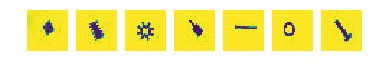

In [209]:
for i in range(7):
    plt.subplot(1,7, i+1)
    plt.axis('off')
    plt.imshow(np.array(Image.open(list_training[i*300])))

In [210]:
def read_image(path):
    image = np.array(Image.open(path))
    image = np.reshape(image, np.product(image.shape))
    return image
#    return image.reshape(image.shape[0], image.shape[1], 1)

In [211]:
image = read_image(list_training[0])
image.shape

(784,)

In [212]:
label_name_list = []
for path in list_training:
    label_name_list.append(get_label_from_path(path))

In [213]:
label_name_list

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [214]:
len(label_name_list)

2100

In [215]:
unique_label_names = np.unique(label_name_list)
unique_label_names

array([1, 2, 3, 4, 5, 6, 7])

In [216]:
def onehot_encode_label(path):
    onehot_label = unique_label_names == get_label_from_path(path)
    onehot_label = onehot_label.astype(np.uint8)
    return onehot_label

In [217]:
onehot_encode_label(list_training[0])

array([0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [218]:
read_image(list_training[0]).shape

(784,)

In [294]:
batch_size = 9
img_h = 28
img_w = 28
ch_n = 1
num_class = 7
num_files = len(label_name_list) #2100

Img1D_size = 784

In [220]:
batch_image = np.zeros((batch_size, Img1D_size))
batch_label = np.zeros((batch_size, num_class))

In [221]:
batch_image.shape, batch_label.shape

((30, 784), (30, 7))

In [222]:
for n, path in enumerate(list_training[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n,: ] = image
    batch_label[n,: ] = onehot_label

In [224]:
batch_image.shape, batch_label.shape

((30, 784), (30, 7))

In [236]:
batch_image[0]

array([255., 255., 255., 254., 253., 253., 253., 253., 255., 248., 246.,
       252., 255., 255., 255., 253., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 254., 253., 252.,
       252., 252., 253., 250., 255., 255., 251., 247., 250., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 253., 253., 252., 251., 251., 251., 252., 252., 246., 255.,
       255., 252., 249., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 251., 250., 250., 249.,
       250., 250., 251., 252., 252., 251., 251., 254., 255., 255., 254.,
       249., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 249., 248., 248., 248., 249., 250., 251., 252., 255.,
       251., 249., 255., 255., 249., 247., 254., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 247., 247., 247.,
       248., 249., 251., 252., 253., 255., 253., 25

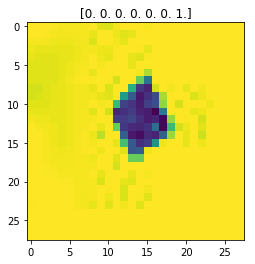

In [237]:
plt.title(batch_label[0])
plt.imshow(np.reshape(batch_image[0],(28,28)))
plt.show()

In [275]:
STEPS = 5

In [239]:
import tensorflow as tf
from layers import conv_layer, max_pool_2x2, full_layer

In [296]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_= tf.placeholder(tf.float32, shape=[None,  7])

In [241]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [292]:
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32])
conv1_pool = max_pool_2x2(conv1)
conv2 = conv_layer(conv1_pool, [5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

In [284]:
keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob = keep_prob)

In [285]:
y_conv = full_layer(full1_drop, 7)

In [286]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_conv, labels=y_))

In [287]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [288]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_,1))

In [289]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [290]:
num_files//batch_size

70

In [297]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #전체 epoch
    for i in range(STEPS): 
        # 배치세트
        for j in range(num_files//batch_size):
            #배치단위 생성
            for n, path in enumerate(list_training[batch_size*j:batch_size*(j+1)]):
                image = read_image(path)
                onehot_label = onehot_encode_label(path)
                batch_image[n,: ] = image
                batch_label[n,: ] = onehot_label
                #print(batch_image.shape, batch_label.shape)
                #print(path,onehot_label)
            #print(batch_label[0], image[0])
            #plt.imshow(np.reshape(batch_image[0],(28,28)))
            #plt.show()
        '''    
        if i % 5 ==0:
            train_accuracy = sess.run(accuracy, feed_dict={x: batch_image, y_:batch_label,
                                                           keep_prob: 1.0})
            print("step {:4d}, training accuracy = {:.3f}".format(j, train_accuracy))
        '''
        sess.run(train_step, feed_dict={x: batch_image, y_: batch_label, keep_prob: 0.5})
        
    
    
    

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_9' with dtype float and shape [?,7]
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,7], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_9', defined at:
  File "/Users/ybbaek/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ybbaek/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-246-dd563679b22f>", line 2, in <module>
    y_= tf.placeholder(tf.float32, shape=[None,  7])
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1777, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4521, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/ybbaek/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_9' with dtype float and shape [?,7]
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,7], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
